# Test particles
In this tutorial, we run a simulation with many test particles. Test particles have no mass and do therefore not perturb other particles. A simulation with test particles can be much faster, because it scales as $\mathcal{O}(N)$ compared to a simulation with massive particles, which scales as $\mathcal{O}(N^2)$. 

But let's first set-up two massive particles in REBOUND, move to the center of mass frame, and choose WHFast (without symplectic correctors) as the integrator.

In [1]:
import rebound
rebound.reset()
rebound.add(m=1.)
rebound.add(m=1e-3, a=1, e=0.05)
rebound.move_to_com()
rebound.integrator = "whfast-nocor"
rebound.dt = 0.05

Next, we'll add the test-particles. We just set the mass to zero. If you give the function `rebound.add()` no `m=NUMBER` argument, then it assume the mass is zero. We randomize the true anomaly of the particles and place them outside the massive planet.

Note that test-particles must be added after all massive planets have been added.

In [2]:
import numpy as np
N_testparticle = 1000
a_initial = np.linspace(1.1, 3, N_testparticle)
for a in a_initial:
    rebound.add(a=a,anom=np.random.rand()*2.*np.pi) # mass is set to 0 by default, random true anomaly   

Next, we set the `N_active` variable of REBOUND to the number of active particles in our simulation. Here, we have two active (massive) particles, the star and the planet.

In [3]:
rebound.N_active = 2

Next, let's do the simulation. We will run it for 200 orbits of the planet which, in our units of $G=1$ is $t_{\rm max} = 200\cdot2\pi$. While we run the simulation, we'll keep track the position of the test particles at 10 intervals.

In [4]:
t_max = 200.*2.*np.pi
N_out = 10
xy = np.zeros((N_out, N_testparticle, 2))
times = np.linspace(0, t_max, N_out)
for i, time in enumerate(times):
    rebound.integrate(time)
    for j, p in enumerate(rebound.particles[2:]):
        xy[i][j] = [p.x, p.y]

We now plot the test particle's positions.

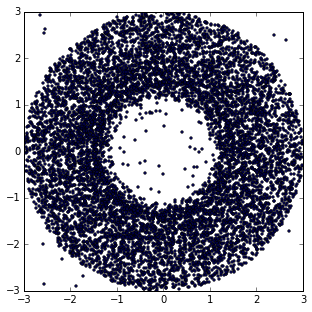

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
plt.scatter(xy[:,:,0],xy[:,:,1],marker=".");

One can see that some particles changed their orbits quite significantly, while others seem to stay roughly on circular orbits. To investigate this a bit further, we now calculate and plot the relative change of the test particles' semi-major axis over the duration of the simulation. We'll plot it as a function of the initial period ratio $r=P_{\rm test particle}/P_{\rm planet}$ for which we make use of Kepler's law, $P = 2\pi\sqrt{a^3/GM}$.

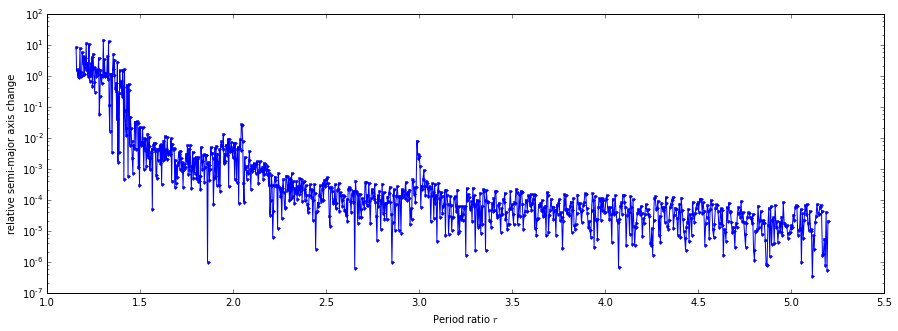

In [7]:
orbits = rebound.calculate_orbits()[1:]
a_final = [o.a for o in orbits]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xlabel(r"Period ratio $r$")
ax.set_ylabel("relative semi-major axis change")
plt.plot(np.power(a_initial,1.5),np.fabs(a_final-a_initial)/a_initial,marker=".");

Very close to the planet test particles change their semi-major axis by order unity. These particles have a close encounter with the planet and get scattered.

We also see two peaks at $r=2$ and $r=3$. These correspond to mean motion resonances. We can also see the mean motion resonances by plotting the eccentricities of the particles. 

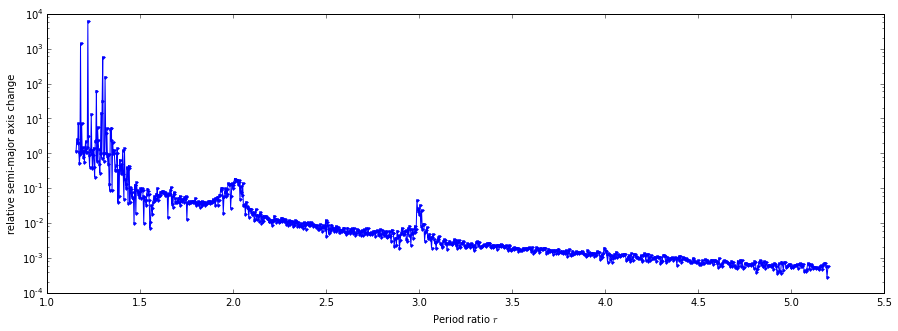

In [8]:
e_final = [o.e for o in orbits]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
#ax.set_ylim([0,1])
ax.set_yscale('log')
ax.set_xlabel(r"Period ratio $r$")

ax.set_ylabel("relative semi-major axis change")
plt.plot(np.power(a_initial,1.5),e_final,marker=".");

Once again, we see peaks at $r=2$ and $r=3$, corresponding to the 2:1 and 3:1 mean motion resonance. You can even see a hint of an effect at $r=4$, the 4:1 mean motion resonance.